In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


x_digits shape: (35631, 129, 71)
y_digits shape: (35631,)


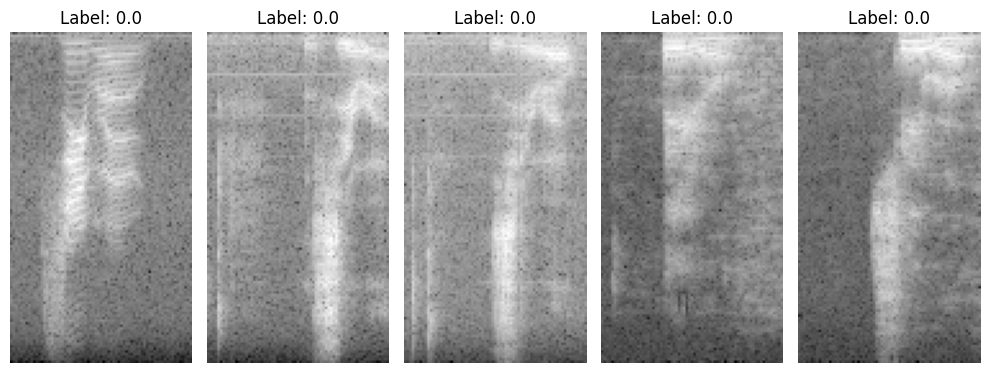

In [ ]:
x_digits = np.load('/content/drive/MyDrive/x_digits.npy')
y_digits = np.load('/content/drive/MyDrive/y_digits.npy')

print(f"x_digits shape: {x_digits.shape}")
print(f"y_digits shape: {y_digits.shape}")

num_images_to_show = 5

plt.figure(figsize=(10, 5))
for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(x_digits[i], cmap='gray')
    plt.title(f"Label: {y_digits[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
X_train_full, X_test,Y_train_full, Y_test = train_test_split(x_digits, y_digits, stratify = y_digits)
X_train, X_valid,Y_train, Y_valid = train_test_split(X_train_full, Y_train_full, stratify = Y_train_full)
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

print(f"x_train shape: {X_train.shape}")
print(f"x_valid shape: {X_valid.shape}")
print(f"x_test shape: {X_test.shape}")

x_train shape: (20042, 129, 71)
x_valid shape: (6681, 129, 71)
x_test shape: (8908, 129, 71)


### Fully Connected Neural Network

In [ ]:
tf.random.set_seed(42)

learning_rates = [0.001, 0.01, 0.1]
histories = []

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")

    # Create a new model instance for each learning rate
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=[129, 71]),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(124, activation="swish", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(124, activation="swish", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(124, activation="swish", kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

    # Compile the model
    optimizer = tf.optimizers.AdamW(learning_rate=lr, weight_decay=0.5)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    # Callbacks
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

    # Train the model
    history = model.fit(
        X_train, Y_train,
        epochs=30,
        validation_data=(X_valid, Y_valid),
        callbacks=[early_stopping_cb, lr_scheduler]
    )

    # Store the history
    histories.append(history)

Training with learning rate: 0.001
Epoch 1/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3534 - loss: 1.7771 - val_accuracy: 0.6569 - val_loss: 1.0144 - learning_rate: 0.0010
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6595 - loss: 0.9579 - val_accuracy: 0.7358 - val_loss: 0.7798 - learning_rate: 0.0010
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7359 - loss: 0.7525 - val_accuracy: 0.7539 - val_loss: 0.7174 - learning_rate: 0.0010
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7689 - loss: 0.6641 - val_accuracy: 0.7644 - val_loss: 0.6891 - learning_rate: 0.0010
Epoch 5/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7901 - loss: 0.6116 - val_accuracy: 0.7735 - val_loss: 0.6603 - learning_rate: 0.0010
Epoch 6/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7991 - loss: 0.5840 - val_accuracy: 0.7770 - val_loss: 0.6484 - learning_rate: 0.0010
Epoch 7/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step -

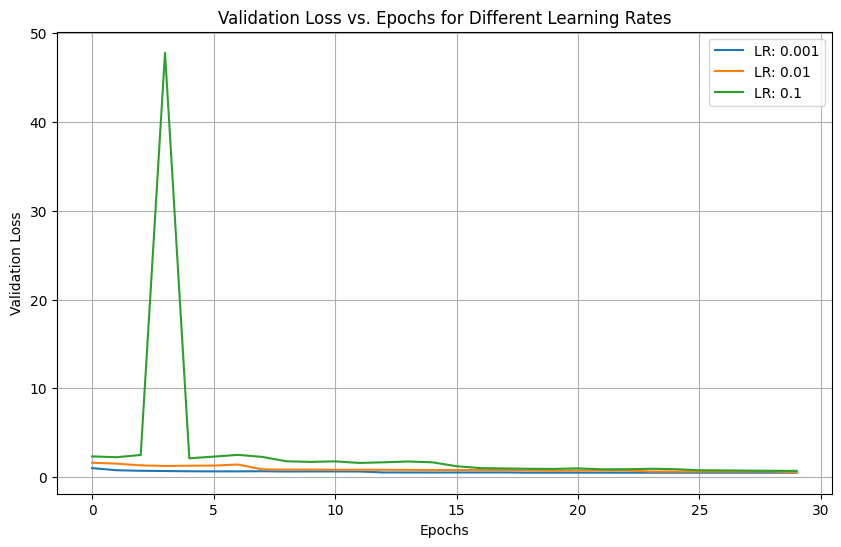

In [ ]:
# Plotting validation loss for each learning rate
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(histories[i].history['val_loss'], label=f'LR: {lr}')

plt.title('Validation Loss vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

The graph shows that both 0.01 and 0.001 learning rates result in similar validation loss trends. For efficiency, it's better to use the higher learning rate of 0.01, as it enables faster convergence. Using ReduceLROnPlateau allows the model to automatically reduce the learning rate if needed, balancing speed with stability.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [129, 71]))
# Flatten: This layer flattens the 2D input (129x71) into a 1D vector (9159), which is necessary before feeding the data into fully connected (dense) layers.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(124, activation = "swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(124, activation = "swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(124, activation = "swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.optimizers.AdamW(learning_rate=0.01, weight_decay=0.5)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
    )


early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

history = model.fit(
    X_train, Y_train,
    epochs=30,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stopping_cb, lr_scheduler]
)

Epoch 1/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3343 - loss: 1.8760 - val_accuracy: 0.5013 - val_loss: 1.4772 - learning_rate: 0.0100
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4782 - loss: 1.4348 - val_accuracy: 0.5230 - val_loss: 1.3491 - learning_rate: 0.0100
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4958 - loss: 1.3922 - val_accuracy: 0.5137 - val_loss: 1.3652 - learning_rate: 0.0100
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4940 - loss: 1.3870 - val_accuracy: 0.4649 - val_loss: 1.4571 - learning_rate: 0.0100
Epoch 5/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4980 - loss: 1.3787 - val_accuracy: 0.4653 - val_loss: 1.4696 - learning_rate: 0.0100
Epoch 6/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6498 - loss: 1.0147 - val_accuracy: 0.7039 - val_loss: 0.8775 - learning_rate: 0.0020
Epoch 7/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6966 - loss: 0.8682 - 

key insights from training neural network:

1. **Neuron Count & Layer Depth:** Using 124 neurons in each hidden layer results in similar accuracy whether you keep the number of neurons the same across all layers or gradually reduce the number of neurons in each subsequent layer. Three hidden layers are optimal—fewer layers reduce accuracy, while more layers don't improve and slightly decrease it.
2. **Activation Function:** Swish outperforms ReLU
3. **Learning Rate:** A learning rate of 0.01 is most effective. Combined with ReduceLROnPlateau, it balances fast learning with fine-tuned adjustments, improving model convergence.
4. **Weight Decay:** A weight decay of 0.5 optimally balances regularization and accuracy, keeping the gap between training and validation accuracy minimal. Increasing it further reduces overfitting but at the cost of overall accuracy.
5. **Training Stability:** Early stopping and learning rate scheduling contribute to efficient training and good generalization, preventing overfitting.

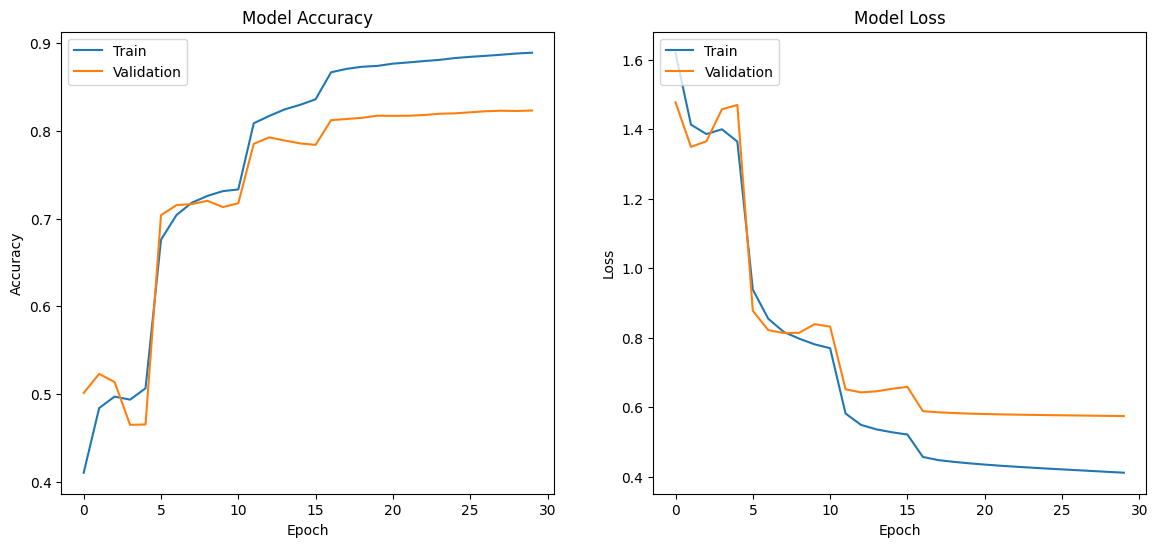

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


The training and validation curves for both accuracy and loss show a steady improvement over time, indicating that the model is learning effectively. The validation curves closely follow the training curves, suggesting that the model generalizes well to unseen data. The relatively small gap between curves implies that overfitting is optimal.

Evaluate the model

In [ ]:
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, Y_test)))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8235 - loss: 0.5692
Loss + accuracy on test data: [0.5788111686706543, 0.8170183897018433]


#Convolutional Neural Network

In [ ]:
X_train_cnn = X_train.reshape([-1, 129, 71, 1])
X_valid_cnn = X_valid.reshape([-1, 129, 71, 1])
X_test_cnn = X_test.reshape([-1, 129, 71, 1])

print(f"x_train shape: {X_train_cnn.shape}")
print(f"x_valid shape: {X_valid_cnn.shape}")
print(f"x_test shape: {X_test_cnn.shape}")

x_train shape: (20042, 129, 71, 1)
x_valid shape: (6681, 129, 71, 1)
x_test shape: (8908, 129, 71, 1)


In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(X_train_cnn[0].shape))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation = "swish", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation = "swish", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = "swish", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation = "swish", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(32, activation = "swish", kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))


optimizer = tf.optimizers.AdamW(learning_rate=0.01, weight_decay=0.005)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
    )

early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)

history = model.fit(
    X_train_cnn, Y_train,
    epochs=30,
    validation_data=(X_valid_cnn, Y_valid),
    callbacks=[early_stopping_cb, lr_scheduler]
)

Epoch 1/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3755 - loss: 1.6922 - val_accuracy: 0.7318 - val_loss: 0.7861 - learning_rate: 0.0100
Epoch 2/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7367 - loss: 0.7613 - val_accuracy: 0.7939 - val_loss: 0.6227 - learning_rate: 0.0100
Epoch 3/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8051 - loss: 0.6047 - val_accuracy: 0.8104 - val_loss: 0.6394 - learning_rate: 0.0100
Epoch 4/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8247 - loss: 0.5627 - val_accuracy: 0.8162 - val_loss: 0.7066 - learning_rate: 0.0100
Epoch 5/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8059 - loss: 0.6683 - val_accuracy: 0.8355 - val_loss: 0.5135 - learning_rate: 0.0100
Epoch 6/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8657 - loss: 0.4472 - val_accuracy: 0.8858 - val_loss: 0.4121 - learning_rate: 0.0100
Epoch 7/30
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8938 - loss: 0.3851 - 

Key insights from training a CNN:

1. **Filter Count & Layer Depth:** Increasing the filters (16, 32, 64) across three convolutional layers effectively captures complex features. The three convolutional layers provide an optimal balance and strong performace, adding more layers increases model complexity without significant accuracy gains.
2. **Activation Function:** Swish performs well in this case, outperforming other options.
3. **Learning Rate:** Staring out with learning rate value of 0.01, the learning rate scheduler gradually reduces the rate when needed, allowing fine-tuning and improved convergence, ultimately leading to stable performance by the end of training
4. **Regularization:** A dropout rate of 0.1 and weight decay of 0.005 help reduce overfitting, keeping training and validation accuracy close and maintaining generalization.

Evaluate the model

In [ ]:
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test_cnn, Y_test)))

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9510 - loss: 0.2020
Loss + accuracy on test data: [0.19898980855941772, 0.9536371827125549]


We can see that CNN performs better on images than Fully Connected Network. (In CNNs, each neuron in a layer is connected only to a small region of the input. This reflects the way images are structured, where local groups of pixels are often strongly correlated, indicating the presence of specific local features like edges, textures, or colors. This local connectivity reduces the number of parameters in the network, making it more computationally efficient.)

In [ ]:
Y_pred_proba = model.predict(X_test) # it will return probabilities
Y_pred = np.argmax(Y_pred_proba, axis=1) # probabilities -> the class(0,1,2,3,4 etc.) with the highest prob
misclassified_indices = np.where(Y_pred != Y_test)[0]
samples = len(Y_test)
misclass_samples = len(misclassified_indices)
print(f"Number of samples: {samples}")
print(f"Number of misclassified samples: {misclass_samples}")
print(f"Incorrectly classified: {misclass_samples / samples * 100:.2f}%")

279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Number of samples: 8908
Number of misclassified samples: 413
Incorrectly classified: 4.64%


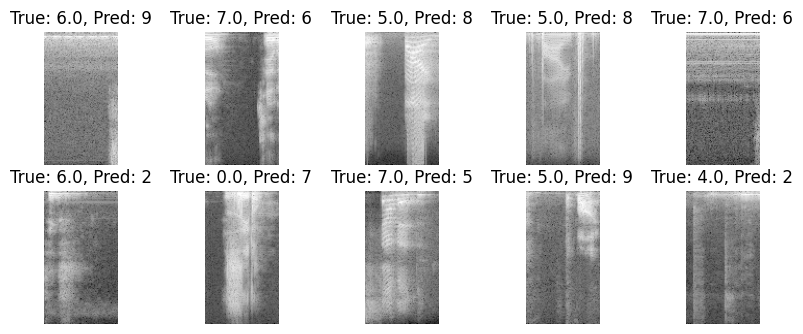

In [ ]:
import matplotlib.pyplot as plt

# Plot a few misclassified examples
num_examples = 10  # Number of examples to plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:num_examples]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {Y_test[index]}, Pred: {Y_pred[index]}")
    plt.axis('off')
plt.show()


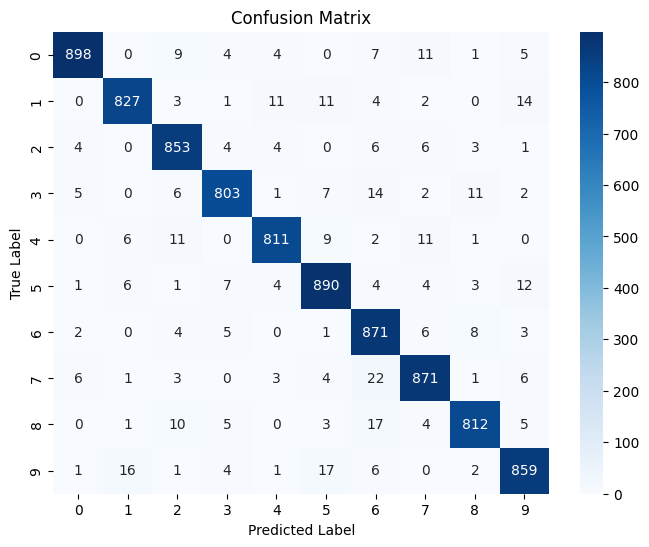

Class 0 was confused 41 times with other classes.
Class 1 was confused 46 times with other classes.
Class 2 was confused 28 times with other classes.
Class 3 was confused 48 times with other classes.
Class 4 was confused 40 times with other classes.
Class 5 was confused 42 times with other classes.
Class 6 was confused 29 times with other classes.
Class 7 was confused 46 times with other classes.
Class 8 was confused 45 times with other classes.
Class 9 was confused 48 times with other classes.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate confusions for each number
for i in range(len(conf_matrix)):
    true_class = i
    correct_predictions = conf_matrix[i, i]  # Diagonal element (correct classifications)
    total_confused = np.sum(conf_matrix[i, :]) - correct_predictions  # Total confusions for the class

    print(f"Class {true_class} was confused {total_confused} times with other classes.")


From this confustion matrix we can conclude that for example 9 is most confused with 5 and 1.
